# Unsupervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

## Clustering: K-means 

In [2]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

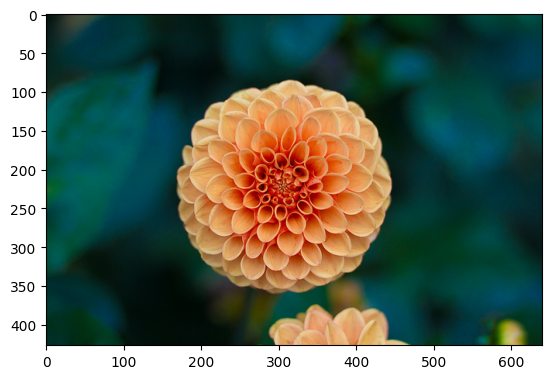

In [3]:
flower = load_sample_image('flower.jpg')

flower = np.array(flower, dtype=np.float64) / 255

plt.imshow(flower);

In [4]:
flower

array([[[0.00784314, 0.0745098 , 0.05098039],
        [0.01176471, 0.07058824, 0.05098039],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.00392157, 0.30196078, 0.25098039],
        [0.        , 0.29803922, 0.25098039],
        [0.        , 0.29411765, 0.24705882]],

       [[0.00392157, 0.07058824, 0.04705882],
        [0.01176471, 0.07058824, 0.05098039],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.        , 0.29803922, 0.25098039],
        [0.00392157, 0.29019608, 0.25490196],
        [0.00392157, 0.29019608, 0.25490196]],

       [[0.00784314, 0.06666667, 0.04705882],
        [0.02352941, 0.0745098 , 0.04705882],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.00392157, 0.29019608, 0.25490196],
        [0.00392157, 0.29019608, 0.2627451 ],
        [0.00392157, 0.29019608, 0.2627451 ]],

       ...,

       [[0.        , 0.18039216, 0.15686275],
        [0.00392157, 0.18823529, 0.15686275],
        [0.00392157, 0

In [5]:
w, h, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (w * h, d))


In [6]:
image_array

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]], shape=(273280, 3))

In [7]:
image_sample = shuffle(image_array, random_state=42)[:1000]

#Fit Kmeans
n_colors = 64
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(image_sample)

#Get color indices for full image
labels = kmeans.predict(image_array)

In [8]:
def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

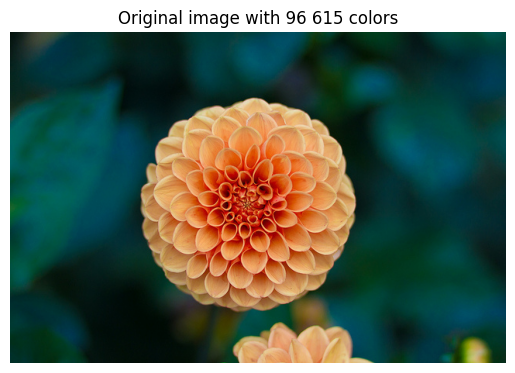

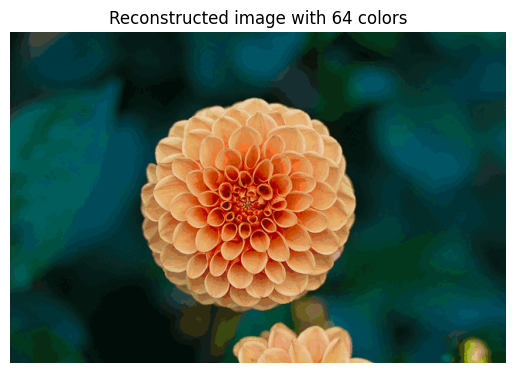

In [9]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image with 96 615 colors')
plt.imshow(flower);

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Reconstructed image with {n_colors} colors')
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h));

## Principal Component Analysis (PCA) 

In [10]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [11]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [12]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [13]:
print('Explained variance ratio from PCA: {}'.format(pca.explained_variance_ratio_))

Explained variance ratio from PCA: [0.92461872 0.05306648]


In [14]:
colors = ['#003f5c', '#bc5090', '#ffa600']
lw=2

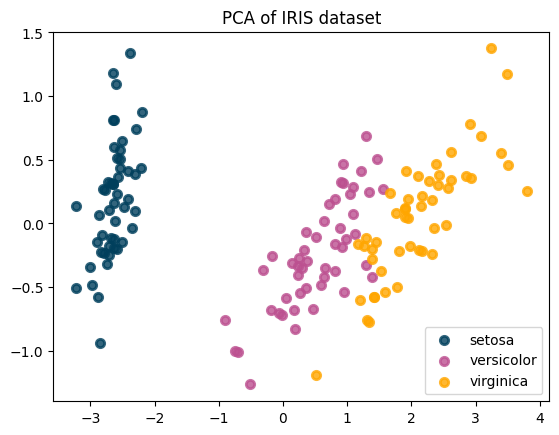

In [15]:
plt.figure()

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset');